In [23]:
df_1 = [['P1',10,5],
        ['P2',29,1],
        ['P3',3,3],
        ['P4',7,4],
        ['P5',12,2]]
df_1

[['P1', 10, 5], ['P2', 29, 1], ['P3', 3, 3], ['P4', 7, 4], ['P5', 12, 2]]

In [24]:
df_2 = [['P1',2,2],
        ['P2',1,1],
        ['P3',8,4],
        ['P4',4,2],
        ['P5',5,3]]
df_2

[['P1', 2, 2], ['P2', 1, 1], ['P3', 8, 4], ['P4', 4, 2], ['P5', 5, 3]]

In [25]:
def findWaitingTime_FCFS(processes, n, bt, wt):
 
    # waiting time for
    # first process is 0
    wt[0] = 0
 
    # calculating waiting time
    for i in range(1, n ):
        wt[i] = bt[i - 1] + wt[i - 1]

In [26]:
def findTurnAroundTime_FCFS(processes, n, bt, wt, tat):
     
    # Calculating turnaround time
    for i in range(n):
        tat[i] = bt[i] + wt[i]

In [27]:
def findavgTime_FCFS( processes, n, bt):
 
    wt = [0] * n
    tat = [0] * n
    total_wt = 0
    total_tat = 0
 
    # Function to find waiting
    # time of all processes
    findWaitingTime_FCFS(processes, n, bt, wt)
 
    # Function to find turn around
    # time for all processes
    findTurnAroundTime_FCFS(processes, n,
                       bt, wt, tat)
 
    # Display processes along
    # with all details
    print( "Processes Burst time " +
                  " Waiting time " +
                " Turn around time")
 
    # Calculate total waiting time
    # and total turn around time
    for i in range(n):
     
        total_wt = total_wt + wt[i]
        total_tat = total_tat + tat[i]
        print(" " + str(i + 1) + "\t\t" +
                    str(bt[i]) + "\t " +
                    str(wt[i]) + "\t\t " +
                    str(tat[i]))
 
    print( "Average waiting time = "+ str(total_wt / n))
    return total_wt/n

In [28]:
def findWaitingTime_RR(processes, n, bt, wt, quantum):
    rem_bt = [0] * n
 
    # Copy the burst time into rt[]
    for i in range(n):
        rem_bt[i] = bt[i]
    t = 0 # Current time

    while(1):
        done = True
        
        for i in range(n):

            if (rem_bt[i] > 0) :
                done = False # There is a pending process
                 
                if (rem_bt[i] > quantum) :

                    t += quantum

                    rem_bt[i] -= quantum
                 
                else:
                    t = t + rem_bt[i]
                    
                    wt[i] = t - bt[i]
                    
                    rem_bt[i] = 0
                 
        # If all processes are done
        if (done == True):
            break

In [29]:
def findTurnAroundTime_RR(processes, n, bt, wt, tat):
     
    # Calculating turnaround time
    for i in range(n):
        tat[i] = bt[i] + wt[i]

In [47]:
# Function to calculate average waiting
# and turn-around times.
def findavgTime_RR(processes, n, bt, quantum):
    wt = [0] * n
    tat = [0] * n
 
    # Function to find waiting time
    # of all processes
    findWaitingTime_RR(processes, n, bt,
                         wt, quantum)
 
    # Function to find turn around time
    # for all processes
    findTurnAroundTime_RR(processes, n, bt,
                                wt, tat)
 
    # Display processes along with all details
    print("Processes    Burst Time     Waiting",
                     "Time    Turn-Around Time")
    total_wt = 0
    total_tat = 0
    for i in range(n):
 
        total_wt = total_wt + wt[i]
        total_tat = total_tat + tat[i]
        print(" ", processes[i], "\t\t", bt[i],
              "\t\t", wt[i], "\t\t", tat[i])   # processes[i]로 고침, i+1에서
 
    print("\nAverage waiting time = %.5f "%(total_wt /n) )
    return total_wt / n

In [ ]:
# Priority 알고리즘
def priority(df) :
    
    d = dict()

    for i in range(5):
        key = df_1[i][0]
        l = list()
        l.append(df_1[i][1])
        l.append(df_1[i][2])
        d[key] = l
        
    d = sorted(d.items(), key=lambda item: item[1][1])
        

    ET = []
    for i in range(len(d)):
        # first process
        if(i==0):
            ET.append(d[i][1][0])

        # get prevET + newBT
        else:
            ET.append(ET[i-1] + d[i][1][0])
            
            
    # TAT는 Turn Around time
    TAT = []
    for i in range(len(d)):
        TAT.append(ET[i]) # arrival time이 없기 때문에, Turn Around Time은 Exit time이 된다.
        
        
        
    # WT는 Wait time
    WT = []
    for i in range(len(d)):
        WT.append(TAT[i] - d[i][1][0]) # d[i][1][0] 은 버스트 시간을 의미한다.
        
        
    # 평균 Wait time 구하기
    avg_WT = 0
    for i in WT:
        avg_WT +=i
    avg_WT = (avg_WT/5)
    
    
    # 출력
    print("Process | Priority | Burst | Exit | Turn Around | Wait |")
    for i in range(5):
          print("   ",d[i][0],"   |   ",d[i][1][1]," |    ",d[i][1][0]," |    ",ET[i],"  |    ",TAT[i],"  |   ",WT[i],"   |  ")
    print("Average Waiting Time: ",avg_WT)

In [48]:
# Driver code
if __name__ =="__main__":
     
    # Process id's
    proc1 = list()
    proc2 = list()
    for i in range(5):
        proc1.append(df_1[i][0])
        proc2.append(df_2[i][0])
 
    # Burst time of all processes
    burst_time1 = list()
    burst_time2 = list()
    for i in range(5):
        burst_time1.append(df_1[i][1])
        burst_time2.append(df_2[i][1])
 
    
    print("1번 프로세스 집합 FCFS")
    proc1_FCFS_wt = findavgTime_FCFS(proc1, 5, burst_time1)
    print('\n')
    print("2번 프로세스 집합 FCFS")
    proc2_FCFS_wt = findavgTime_FCFS(proc2, 5, burst_time2)
    print('\n')
    print('\n')
    
    
    # Time quantum
    quantum = 2;
    print("1번 프로세스 집합 RR")
    proc1_RR_wt = findavgTime_RR(proc1, 5, burst_time1, quantum)
    print('\n')
    print("2번 프로세스 집합 RR")
    proc2_RR_wt = findavgTime_RR(proc2, 5, burst_time2, quantum)

1번 프로세스 집합 FCFS
Processes Burst time  Waiting time  Turn around time
 1		10	 0		 10
 2		29	 10		 39
 3		3	 39		 42
 4		7	 42		 49
 5		12	 49		 61
Average waiting time = 28.0


2번 프로세스 집합 FCFS
Processes Burst time  Waiting time  Turn around time
 1		2	 0		 2
 2		1	 2		 3
 3		8	 3		 11
 4		4	 11		 15
 5		5	 15		 20
Average waiting time = 6.2




1번 프로세스 집합 RR
Processes    Burst Time     Waiting Time    Turn-Around Time
  P1 		 10 		 26 		 36
  P2 		 29 		 32 		 61
  P3 		 3 		 12 		 15
  P4 		 7 		 25 		 32
  P5 		 12 		 32 		 44

Average waiting time = 25.40000 


2번 프로세스 집합 RR
Processes    Burst Time     Waiting Time    Turn-Around Time
  P1 		 2 		 0 		 2
  P2 		 1 		 2 		 3
  P3 		 8 		 12 		 20
  P4 		 4 		 9 		 13
  P5 		 5 		 13 		 18

Average waiting time = 7.20000 


In [42]:
proc1_FCFS_wt

28.0

In [50]:
proc1_RR_wt

25.4

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

data={'스케줄링 알고리즘': ['FCFS','RR'], '평균 대기 시간': [proc1_FCFS_wt, proc1_RR_wt] }
df = pd.DataFrame(data)
df

,스케줄링 알고리즘,평균 대기 시간
0,FCFS,28.0
1,RR,25.4


In [63]:
df['평균 대기 시간']

0    28.0
1    25.4
Name: 평균 대기 시간, dtype: float64

In [54]:
from matplotlib import font_manager, rc

font_path = "C:/Windows/Fonts/gulim.ttc"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

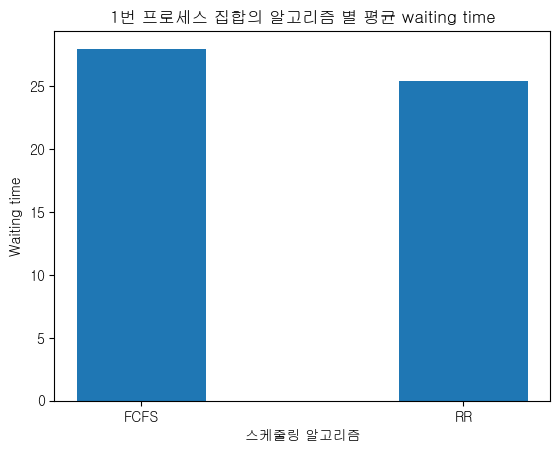

In [72]:
plt.title('1번 프로세스 집합의 알고리즘 별 평균 waiting time')
plt.bar(df['스케줄링 알고리즘'], df['평균 대기 시간'], width=0.4)
plt.xlabel('스케줄링 알고리즘')
plt.ylabel('Waiting time')

plt.show()

In [73]:
data={'스케줄링 알고리즘': ['FCFS','RR'], '평균 대기 시간': [proc2_FCFS_wt, proc2_RR_wt] }
df = pd.DataFrame(data)
df

,스케줄링 알고리즘,평균 대기 시간
0,FCFS,6.2
1,RR,7.2


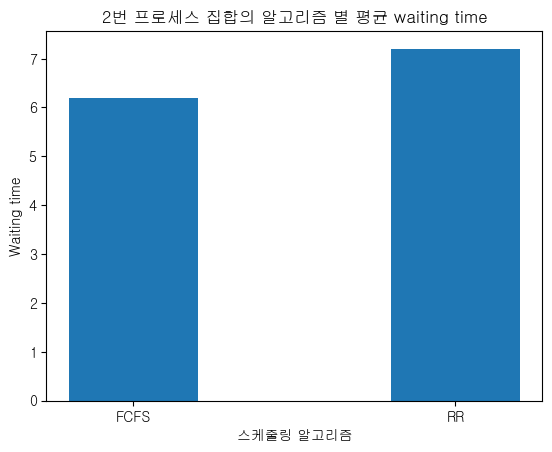

In [74]:
plt.title('2번 프로세스 집합의 알고리즘 별 평균 waiting time')
plt.bar(df['스케줄링 알고리즘'], df['평균 대기 시간'], width=0.4)
plt.xlabel('스케줄링 알고리즘')
plt.ylabel('Waiting time')

plt.show()